In [44]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import esda
import geojson
import json
import matplotlib.pyplot as plt
import contextily as ctx
import libpysal as lps

In [2]:
gdf = gpd.read_file('./geojson/bairros.geojson')

In [3]:
gdf

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"MULTIPOLYGON (((-46.44623 -23.55651, -46.44610..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"MULTIPOLYGON (((-46.75838 -23.64859, -46.75835..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"MULTIPOLYGON (((-46.47502 -23.52381, -46.47501..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"MULTIPOLYGON (((-46.75600 -23.49516, -46.75599..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"MULTIPOLYGON (((-46.58148 -23.57298, -46.58145..."
...,...,...,...,...,...,...,...,...,...,...
91,4.0,8583433.0,1.0,VILA MARIA,VMR,89,07,2007-03-19,0.0,"MULTIPOLYGON (((-46.58508 -23.52832, -46.58519..."
92,4.0,8583434.0,1.0,VILA MARIANA,VMN,90,12,2007-03-19,0.0,"MULTIPOLYGON (((-46.65081 -23.59868, -46.65080..."
93,4.0,8583435.0,1.0,VILA MATILDE,VMT,91,21,2007-03-19,0.0,"MULTIPOLYGON (((-46.54827 -23.53505, -46.54842..."
94,4.0,8583412.0,1.0,SANTA CECILIA,SCE,69,09,2007-03-19,0.0,"MULTIPOLYGON (((-46.66362 -23.53701, -46.66355..."


In [19]:
gdf = gdf.to_crs(epsg=3857)

(-5215241.243447162,
 -5158772.518645412,
 -2758358.2269679923,
 -2671238.9599337648)

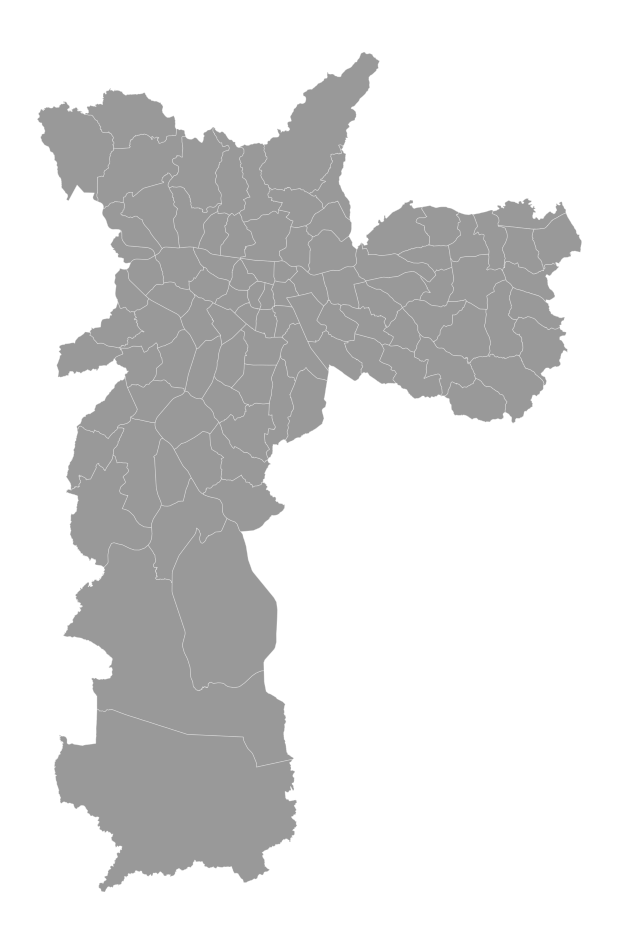

In [20]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

gdf.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
#ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [26]:
db_sp = pd.read_excel('data_base_ago_2022.xlsx')
db_sp = db_sp[db_sp['DEPARTAMENTO_CIRC']=='DECAP']

In [27]:
homicidios = gpd.GeoDataFrame(db_sp, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(db_sp.LONGITUDE, db_sp.LATITUDE))

In [28]:
homicidios = homicidios.to_crs(epsg=3857)

In [29]:
homicidios.LATITUDE = homicidios.LATITUDE.astype(float)
homicidios.LONGITUDE = homicidios.LONGITUDE.astype(float)

In [30]:
homicidios.LATITUDE = homicidios.LATITUDE.astype(float)

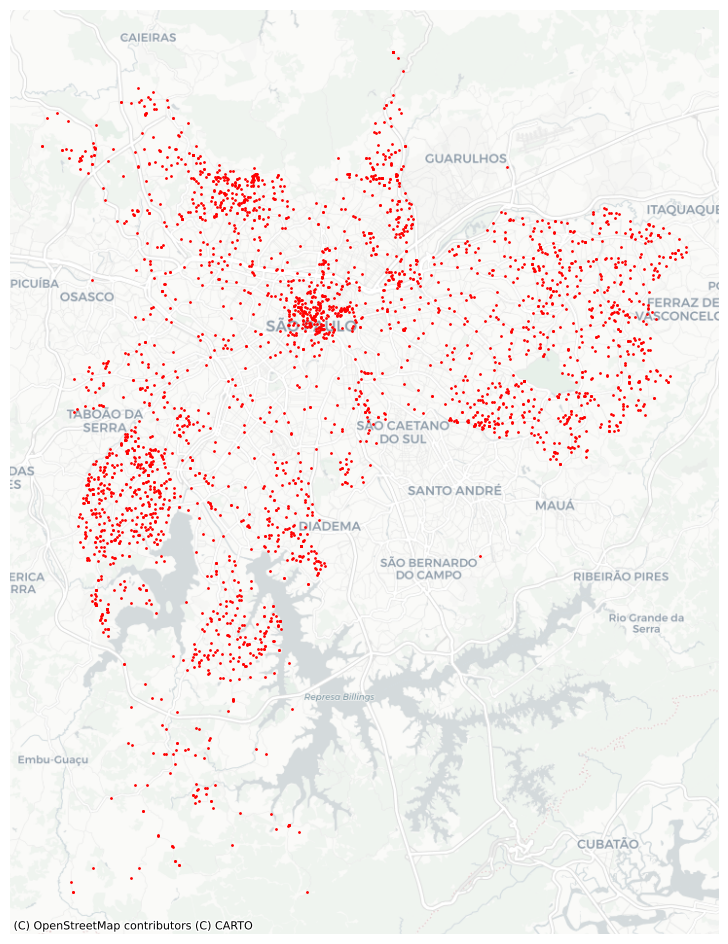

In [32]:
fig,ax = plt.subplots(figsize=(12,12))

homicidios.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [10]:
#sobrepor

minx, miny, maxx, maxy = homicidios.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-46.823291511
-46.3686557126304
-23.917484416
-23.374154661


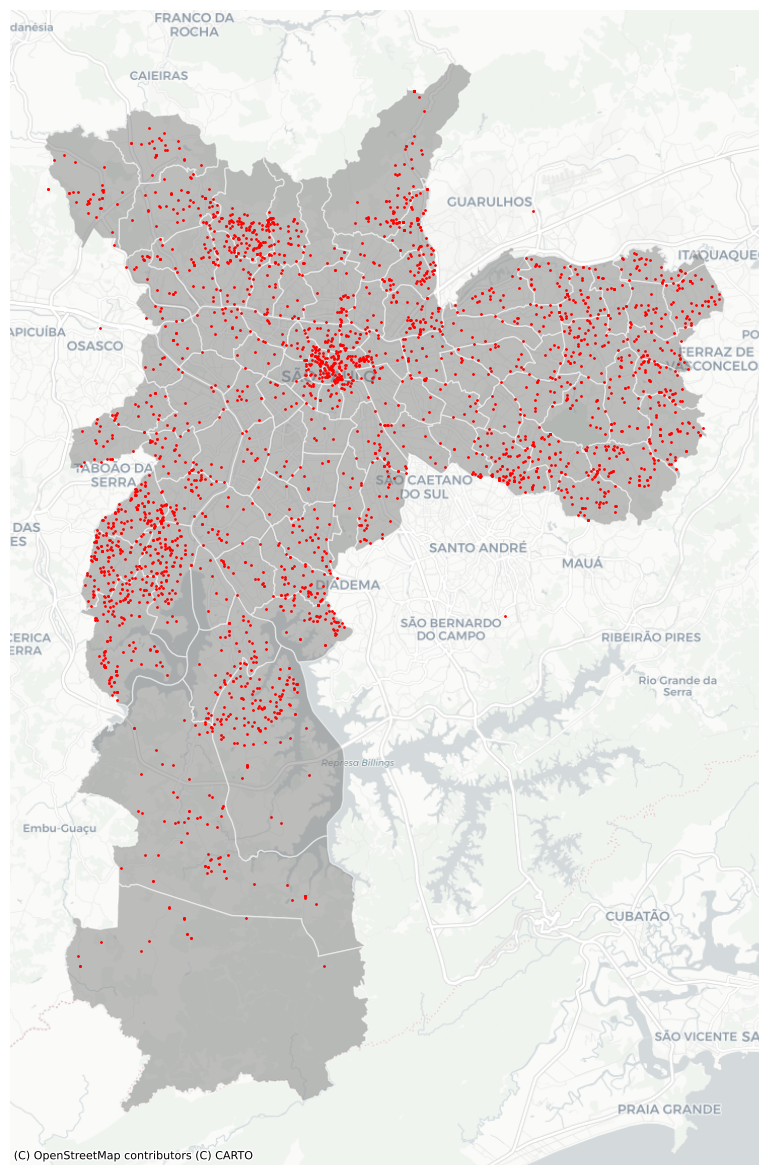

In [33]:
# set up the plot canvas with plt.subplots in one column, one row
fig, ax = plt.subplots(1,1,figsize=(15, 15))

# block groups
gdf.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# arrests
homicidios.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=1,
            alpha=1)

# use the bounding box coordinates to set the x and y limits
#ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
#ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [34]:
import rtree
join = gpd.sjoin(homicidios,gdf,how='left')
join

,DEPARTAMENTO_CIRC,SECCIONAL - CIRCUNSCRICAO,MUNICIPIO - CIRCUNSCRICAO,DP - CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,mês,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,CIDADE,DP_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,geometry,index_right,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2017,2017-01-21 00:00:00,440,2017,S.PAULO,02º D.P. BOM RETIRO,DEL.SEC.1º CENTRO,DECAP,2017-01-21,17:15:00,Via pública,PRAÇA DA LUZ,1,-23.535135,-46.633779,Vítima,Masculino,NaN,NaT,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-5191248.545 -2696863.705),24.0,4.0,8583449.0,1.0,BOM RETIRO,BRE,9,09,2007-03-19,0.0
1,DECAP,1ª SEC,São Paulo,012 DP - Pari,1.0,1,10108,1,2017,2017-01-24 00:00:00,489,2017,S.PAULO,08º D.P. BRAS,DEL.SEC.1º CENTRO,DECAP,2017-01-24,16:32:00,Via pública,RUA JOAQUIM CARLOS,1379,-23.524742,-46.608382,Vítima,Masculino,NaN,NaT,Preta,NaN,HOMICÍDIO DOLOSO,POINT (-5188421.368 -2695601.866),59.0,4.0,8583399.0,1.0,PARI,PRI,56,25,2007-03-19,0.0
2,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,1.0,1,10216,1,2017,2017-01-15 00:00:00,470,2017,S.PAULO,16º D.P. VILA CLEMENTINO,DEL.SEC.2º SUL,DECAP,2017-01-15,01:14:00,Via pública,TRAVESSA JUPATIS,110,-23.652974,-46.649025,Vítima,Masculino,33,1983-09-05,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO,POINT (-5192945.756 -2711178.140),52.0,4.0,8583477.0,1.0,JABAQUARA,JAB,38,15,2007-03-19,0.0
3,DECAP,3ª SEC,São Paulo,046 DP - Perus,1.0,1,10333,1,2017,2017-01-01 00:00:00,5,2017,S.PAULO,33º D.P. PIRITUBA,DEL.SEC.3º OESTE,DECAP,2017-01-01,04:30:00,Via pública,RUA JOÃO DE BARRO,38,-23.426599,-46.752877,Vítima,Masculino,28,1988-04-05,Preta,CONFERENTE,HOMICÍDIO DOLOSO,POINT (-5204506.487 -2683690.775),64.0,4.0,8583404.0,1.0,PERUS,PRS,61,01,2007-03-19,0.0
4,DECAP,3ª SEC,São Paulo,046 DP - Perus,1.0,1,10346,1,2017,2017-01-05 00:00:00,67,2017,S.PAULO,46º D.P. PERUS,DEL.SEC.3º OESTE,DECAP,2017-01-05,10:40:00,Rodovia/Estrada,RODOVIA SP 348,27,-23.406669,-46.767526,Vítima,Masculino,20,1996-03-25,Preta,DESEMPREGADO,HOMICÍDIO DOLOSO,POINT (-5206137.168 -2681273.031),64.0,4.0,8583404.0,1.0,PERUS,PRS,61,01,2007-03-19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1.0,1,10353,8,2022,2022-08-24 10:51:00,4604,2022,S.PAULO,53º D.P. PARQUE DO CARMO,DEL.SEC.8º SAO MATEUS,DECAP,2022-08-24,DE MADRUGADA,Via pública,ESTRADA DA FAZENDA DO CARMO,450,-23.597449,-46.459139,Vítima,Masculino,NaN,NaT,Branca,NaN,HOMICÍDIO DOLOSO,POINT (-5171807.681 -2704431.672),47.0,4.0,8583472.0,1.0,IGUATEMI,IGU,33,30,2007-03-19,0.0
12295,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,1.0,1,20249,8,2022,2022-08-14 09:00:00,6773,2022,S.PAULO,49º D.P. SAO MATEUS,DEL.SEC.8º SAO MATEUS,DECAP,2022-08-14,07:29:00,Via pública,AVENIDA JACU PESSEGO NOVA TRABALHADORES,1000,-23.621533,-46.449636,Vítima,Masculino,40,1981-10-24,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-5170749.870 -2707357.629),77.0,4.0,8583419.0,1.0,SAO RAFAEL,SRA,75,30,2007-03-19,0.0
12296,DECAP,8ª SEC,São Paulo,053 DP - Parque do Carmo,1.0,1,10353,8,2022,2022-08-31 18:38:00,4771,2022,S.PAULO,53º D.P. PARQUE DO CARMO,DEL.SEC.8º SAO MATEUS,DECAP,2022-08-31,08:58:00,Via pública,ESTRADA DA FAZENDA DO CARMO,10,-23.597449,-46.459139,Vítima,Masculino,46,1976-07-20,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-5171807.681 -2704431.672),47.0,4.0,8583472.0,1.0,IGUATEMI,IGU,33,30,2007-03-19,0.0
12297,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1.0,1,20249,8,2022,2022-08-22 00:00:00,7039,2022,S.PAULO,49º D.P. SAO MATEUS,DEL.SEC.8º SAO MATEUS,DECAP,2022-08-22,00:01:00,Via pública,RUA PROFESSORA JACANA ALTAIR,5,-23.623673,-46.446855,Vítima,Masculino,NaN,NaT,Parda,OUTROS,HOMICÍDIO DOLOSO,POINT (-51

In [35]:
aux = join['NOME_DIST'].value_counts().to_frame().reset_index()
aux

,index,NOME_DIST
0,JD ANGELA,133
1,JD SAO LUIS,121
2,GRAJAU,119
3,CAMPO LIMPO,105
4,BRASILANDIA,102
...,...,...
91,VILA MARIANA,6
92,SOCORRO,6
93,CAMPO BELO,6
94,AGUA RASA,5


In [14]:
pd.set_option('display.max_columns', 500)

In [38]:
gdf

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"MULTIPOLYGON (((-5170370.813 -2699458.745, -51..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"MULTIPOLYGON (((-5205119.283 -2710645.198, -52..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"MULTIPOLYGON (((-5173575.157 -2695488.856, -51..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"MULTIPOLYGON (((-5204854.399 -2692010.566, -52..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"MULTIPOLYGON (((-5185426.262 -2701460.096, -51..."
...,...,...,...,...,...,...,...,...,...,...
91,4.0,8583433.0,1.0,VILA MARIA,VMR,89,07,2007-03-19,0.0,"MULTIPOLYGON (((-5185827.095 -2696036.080, -51..."
92,4.0,8583434.0,1.0,VILA MARIANA,VMN,90,12,2007-03-19,0.0,"MULTIPOLYGON (((-5193144.971 -2704581.601, -51..."
93,4.0,8583435.0,1.0,VILA MATILDE,VMT,91,21,2007-03-19,0.0,"MULTIPOLYGON (((-5181729.787 -2696852.969, -51..."
94,4.0,8583412.0,1.0,SANTA CECILIA,SCE,69,09,2007-03-19,0.0,"MULTIPOLYGON (((-5194570.068 -2697091.794, -51..."


In [37]:
gdf2 = pd.merge(gdf,aux, how = 'left',left_on='NOME_DIST',right_on='index')
gdf2

,CLASSID,FEATID,REVISIONNU,NOME_DIST_x,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry,index,NOME_DIST_y
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"MULTIPOLYGON (((-5170370.813 -2699458.745, -51...",JOSE BONIFACIO,34
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"MULTIPOLYGON (((-5205119.283 -2710645.198, -52...",JD SAO LUIS,121
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"MULTIPOLYGON (((-5173575.157 -2695488.856, -51...",ARTUR ALVIM,9
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"MULTIPOLYGON (((-5204854.399 -2692010.566, -52...",JAGUARA,8
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"MULTIPOLYGON (((-5185426.262 -2701460.096, -51...",VILA PRUDENTE,12
...,...,...,...,...,...,...,...,...,...,...,...,...
91,4.0,8583433.0,1.0,VILA MARIA,VMR,89,07,2007-03-19,0.0,"MULTIPOLYGON (((-5185827.095 -2696036.080, -51...",VILA MARIA,54
92,4.0,8583434.0,1.0,VILA MARIANA,VMN,90,12,2007-03-19,0.0,"MULTIPOLYGON (((-5193144.971 -2704581.601, -51...",VILA MARIANA,6
93,4.0,8583435.0,1.0,VILA MATILDE,VMT,91,21,2007-03-19,0.0,"MULTIPOLYGON (((-5181729.787 -2696852.969, -51...",VILA MATILDE,14
94,4.0,8583412.0,1.0,SANTA CECILIA,SCE,69,09,2007-03-19,0.0,"MULTIPOLYGON (((-5194570.068 -2697091.794, -51...",SANTA CECILIA,22


<AxesSubplot: >

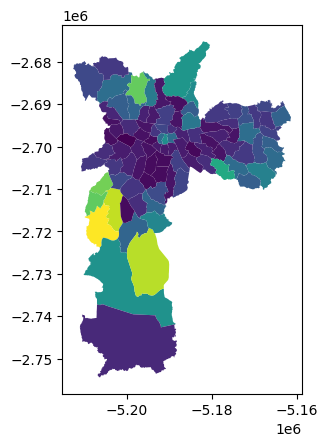

In [39]:
gdf2.plot(column='NOME_DIST_y')

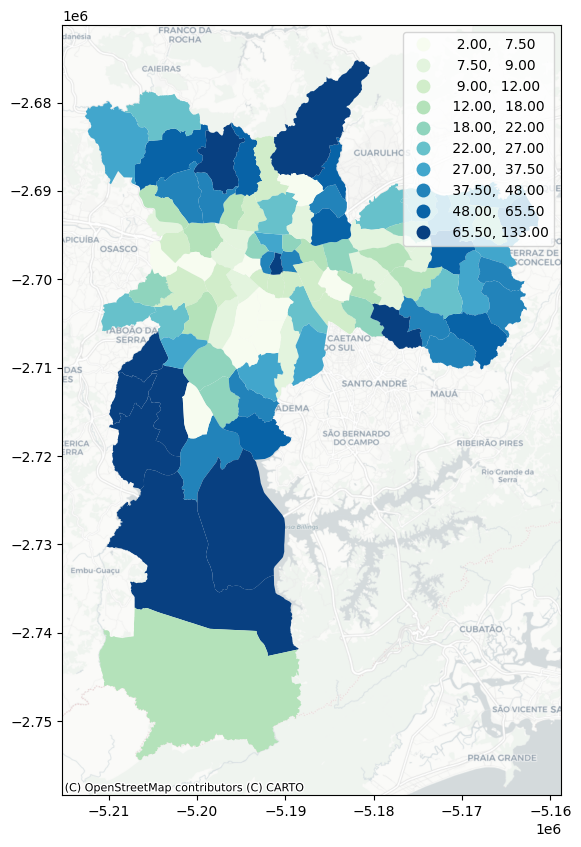

In [43]:
#encontrar meio de normalizar as quantidades, talvez por tamanho da área ou população

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf2.plot(column='NOME_DIST_y', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [47]:
#correlacao espacial

df = gdf2
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

('WARNING: ', 33, ' is an island (no neighbors)')


c:\Users\johnn\Desktop\Data science\Dados_violencia_tcc\Analise espacial\env_spatial\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 33.
  warnings.warn(message)


In [48]:
y = df['NOME_DIST_y']
ylag = lps.weights.lag_spatial(wq, y)

In [49]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

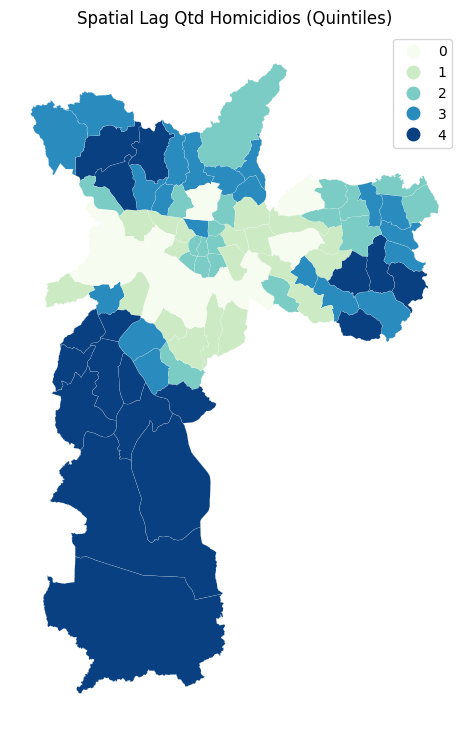

In [51]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Qtd Homicidios (Quintiles)")

plt.show()

In [53]:
#global autocorrelação

y.median()

22.0

In [54]:
yb = y > y.median()
sum(yb)

47

In [55]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

<AxesSubplot: >

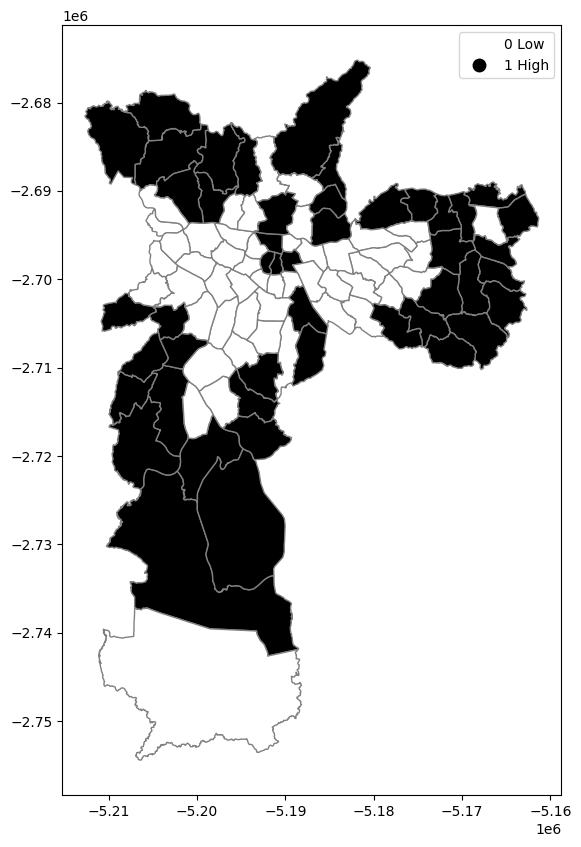

In [56]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)